MAE:  373.38
RMSE: 6764.14
R²:   -141.1636


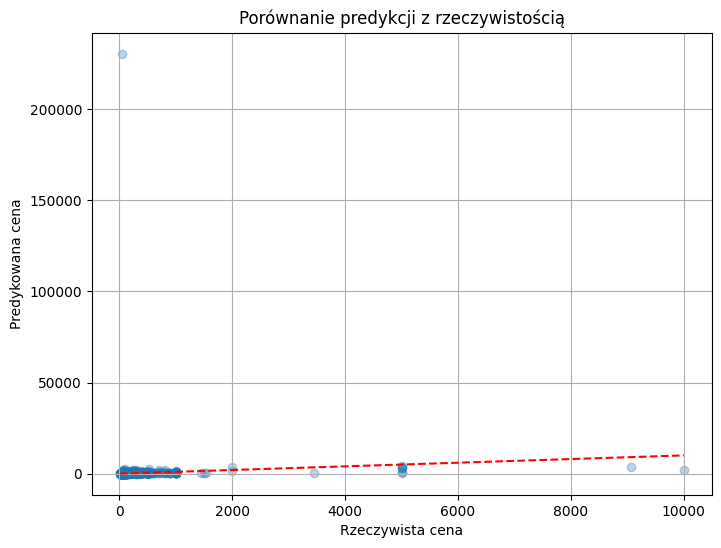

In [ ]:
# Importy
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Wczytaj dane
file_path = "../data/final_data.csv"
df = pd.read_csv(file_path, delimiter=';')
df.drop(columns=["id"], inplace=True)

# Histogram cen
plt.hist(df["price"], bins=100)
plt.xlabel("Cena")
plt.ylabel("Liczba ofert")
plt.title("Rozkład cen")
plt.grid(True)
plt.show()

# Usunięcie outlierów (5% największych wartości)
df = df[df["price"] < df["price"].quantile(0.95)]

# Korelacje cech numerycznych z price
correlations = df.corr(numeric_only=True)["price"].sort_values(ascending=False)
print("\nKorelacje z ceną:\n", correlations)

# Przygotowanie danych
X = df.drop(columns=["price"])
y = df["price"]

# Standaryzacja cech
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Podział na zbiory uczący i testowy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# Predykcja
y_pred = model.predict(X_test)

# Metryki
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

# Wykres porównania predykcji do rzeczywistych cen
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Rzeczywista cena")
plt.ylabel("Predykowana cena")
plt.title("Porównanie predykcji z rzeczywistością")
plt.grid(True)
plt.show()
